In [1]:
!pip install rouge_score -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_metric

In [3]:
metric = load_metric("rouge")

In [4]:
model_names = ['bert-tiny', 't5-small', 'distil-roberta', 'bart-small']
seeds = [15, 42, 97]

In [5]:
output_data = []

for model_name in model_names:
    for seed in seeds:
       
        df = pd.read_csv(f"/kaggle/input/outputs-summarization/{model_name}_{seed}.csv")
        rouge_measures = metric.compute(predictions=df['pred'], references=df['summary'])
        output_data.append({'model': model_name,
                            'seed': seed,
                            'precision_rouge1': rouge_measures['rouge1'][1][0],
                            'recall_rouge1': rouge_measures['rouge1'][1][1],
                            'fmeasure_rouge1': rouge_measures['rouge1'][1][2],
                            'precision_rouge2': rouge_measures['rouge2'][1][0],
                            'recall_rouge2': rouge_measures['rouge2'][1][1],
                            'fmeasure_rouge2': rouge_measures['rouge2'][1][2],
                            'precision_rougeL': rouge_measures['rougeL'][1][0],
                            'recall_rougeL': rouge_measures['rougeL'][1][1],
                            'fmeasure_rougeL': rouge_measures['rougeL'][1][2],
                            'precision_rougeLsum': rouge_measures['rougeLsum'][1][0],
                            'recall_rougeLsum': rouge_measures['rougeLsum'][1][1],
                            'fmeasure_rougeLsum': rouge_measures['rougeLsum'][1][2]
                           })

df_measures = pd.DataFrame(output_data)

In [6]:
df_measures

,model,seed,precision_rouge1,recall_rouge1,fmeasure_rouge1,precision_rouge2,recall_rouge2,fmeasure_rouge2,precision_rougeL,recall_rougeL,fmeasure_rougeL,precision_rougeLsum,recall_rougeLsum,fmeasure_rougeLsum
0,bert-tiny,15,0.251452,0.189383,0.212373,0.055359,0.041714,0.046702,0.207509,0.157180,0.175745,0.207512,0.157186,0.175726
1,bert-tiny,42,0.242140,0.186103,0.207028,0.053671,0.041364,0.045900,0.202489,0.156599,0.173670,0.202525,0.156637,0.173717
2,bert-tiny,97,0.247174,0.189976,0.211272,0.054086,0.041671,0.046256,0.204346,0.157977,0.175174,0.204398,0.158020,0.175220
3,t5-small,15,0.333480,0.201390,0.245290,0.090338,0.053691,0.065625,0.268975,0.162374,0.197712,0.268936,0.162418,0.197731
4,t5-small,42,0.331308,0.199821,0.243444,0.089748,0.053386,0.065273,0.266536,0.160910,0.195884,0.266508,0.160974,0.195906
5,t5-small,97,0.332403,0.201747,0.245422,0.089010,0.053180,0.064963,0.267560,0.162450,0.197508,0.267639,0.162533,0.197573
6,distil-roberta,15,0.347626,0.244056,0.281904,0.107165,0.075038,0.086647,0.282221,0.199034,0.229343,0.282273,0.199088,0.229381
7,distil-roberta,42,0.346869,0.241704,0.279906,0.108777,0.075319,0.087329,0.281620,0.197093,0.227755,0.281683,0.197172,0.227798
8,distil-roberta,97,0.350259,0.238904,0.279187,0.109029,0.074041,0.086552,0.284337,0.194554,0.227036,0.284286,0.194593,0.227014
9,bart-small,15,0.348825,0.098895,0.151200,0.097172,0.024909,0.038630,0.311061,0.088297,0.134855,0.311139,0.088334,0.134918


In [7]:
df_aggregated = df_measures.drop('seed', axis=1).groupby('model', as_index=False).mean()
df_aggregated

,model,precision_rouge1,recall_rouge1,fmeasure_rouge1,precision_rouge2,recall_rouge2,fmeasure_rouge2,precision_rougeL,recall_rougeL,fmeasure_rougeL,precision_rougeLsum,recall_rougeLsum,fmeasure_rougeLsum
0,bart-small,0.347595,0.099157,0.151395,0.096250,0.024902,0.038527,0.309406,0.088290,0.134720,0.309583,0.088345,0.134790
1,bert-tiny,0.246922,0.188487,0.210224,0.054372,0.041583,0.046286,0.204782,0.157252,0.174863,0.204812,0.157281,0.174888
2,distil-roberta,0.348252,0.241555,0.280332,0.108324,0.074799,0.086843,0.282726,0.196894,0.228044,0.282747,0.196951,0.228064
3,t5-small,0.332397,0.200986,0.244718,0.089699,0.053419,0.065287,0.267691,0.161911,0.197035,0.267694,0.161975,0.197070


In [8]:
df_error = df_measures.drop(['seed'], axis=1).groupby('model', as_index=False).std().apply(lambda x: x/np.sqrt(3) if isinstance(x, str) else x)
df_error

,model,precision_rouge1,recall_rouge1,fmeasure_rouge1,precision_rouge2,recall_rouge2,fmeasure_rouge2,precision_rougeL,recall_rougeL,fmeasure_rougeL,precision_rougeLsum,recall_rougeLsum,fmeasure_rougeLsum
0,bart-small,0.007551,0.002759,0.003981,0.002291,0.000733,0.001058,0.005645,0.002077,0.002982,0.005732,0.002099,0.003026
1,bert-tiny,0.004661,0.002086,0.002823,0.000880,0.000191,0.000402,0.002538,0.000691,0.001072,0.002519,0.000696,0.001045
2,distil-roberta,0.001780,0.002579,0.001408,0.001011,0.000672,0.000424,0.001427,0.002246,0.001181,0.001365,0.002256,0.001206
3,t5-small,0.001086,0.001024,0.001106,0.000666,0.000257,0.000331,0.001224,0.000868,0.001002,0.001215,0.000869,0.001011


In [9]:
df_significance = df_aggregated[['model']].copy()
l = len(df_significance)


for m in ['fmeasure_rouge1', 'fmeasure_rouge2', 'fmeasure_rougeL']:
    baseline_score = df_aggregated[m][0]
    baseline_score_err = df_error[m][0]

    score_delta = []
    score_error = []
    score_sigma = []

    for i in range(l):
        delta = df_aggregated[m][i] - baseline_score
        error = np.sqrt(df_error[m][i]**2 + baseline_score_err**2)
        sigma = np.abs(delta/error)

        score_delta.append(delta)
        score_error.append(error)
        score_sigma.append(sigma)

    df_significance[m + ' delta'] = score_delta
    df_significance[m + ' error'] = score_error
    df_significance[m + ' sigma'] = score_sigma

df_significance

,model,fmeasure_rouge1 delta,fmeasure_rouge1 error,fmeasure_rouge1 sigma,fmeasure_rouge2 delta,fmeasure_rouge2 error,fmeasure_rouge2 sigma,fmeasure_rougeL delta,fmeasure_rougeL error,fmeasure_rougeL sigma
0,bart-small,0.000000,0.005630,0.000000,0.000000,0.001496,0.000000,0.000000,0.004218,0.000000
1,bert-tiny,0.058829,0.004880,12.054235,0.007759,0.001132,6.856313,0.040143,0.003169,12.666042
2,distil-roberta,0.128937,0.004223,30.532662,0.048316,0.001139,42.403186,0.093324,0.003208,29.094364
3,t5-small,0.093323,0.004132,22.585282,0.026760,0.001108,24.142770,0.062315,0.003146,19.806548


In [10]:
output_pegasus = []
df_pegasus = pd.read_csv("/kaggle/input/outputs-summarization/pegasus.csv")
rouge_measures_pegasus = metric.compute(predictions=df_pegasus['pred'], references=df_pegasus['summary'])
output_pegasus.append({'model': 'pegasus',
                    'precision_rouge1': rouge_measures_pegasus['rouge1'][1][0],
                    'recall_rouge1': rouge_measures_pegasus['rouge1'][1][1],
                    'fmeasure_rouge1': rouge_measures_pegasus['rouge1'][1][2],
                    'precision_rouge2': rouge_measures_pegasus['rouge2'][1][0],
                    'recall_rouge2': rouge_measures_pegasus['rouge2'][1][1],
                    'fmeasure_rouge2': rouge_measures_pegasus['rouge2'][1][2],
                    'precision_rougeL': rouge_measures_pegasus['rougeL'][1][0],
                    'recall_rougeL': rouge_measures_pegasus['rougeL'][1][1],
                    'fmeasure_rougeL': rouge_measures_pegasus['rougeL'][1][2],
                    'precision_rougeLsum': rouge_measures_pegasus['rougeLsum'][1][0],
                    'recall_rougeLsum': rouge_measures_pegasus['rougeLsum'][1][1],
                    'fmeasure_rougeLsum': rouge_measures_pegasus['rougeLsum'][1][2]
                   })

In [11]:
df = df_aggregated.append(output_pegasus).reset_index(drop=True)
df

,model,precision_rouge1,recall_rouge1,fmeasure_rouge1,precision_rouge2,recall_rouge2,fmeasure_rouge2,precision_rougeL,recall_rougeL,fmeasure_rougeL,precision_rougeLsum,recall_rougeLsum,fmeasure_rougeLsum
0,bart-small,0.347595,0.099157,0.151395,0.096250,0.024902,0.038527,0.309406,0.088290,0.134720,0.309583,0.088345,0.134790
1,bert-tiny,0.246922,0.188487,0.210224,0.054372,0.041583,0.046286,0.204782,0.157252,0.174863,0.204812,0.157281,0.174888
2,distil-roberta,0.348252,0.241555,0.280332,0.108324,0.074799,0.086843,0.282726,0.196894,0.228044,0.282747,0.196951,0.228064
3,t5-small,0.332397,0.200986,0.244718,0.089699,0.053419,0.065287,0.267691,0.161911,0.197035,0.267694,0.161975,0.197070
4,pegasus,0.391264,0.371267,0.371448,0.166567,0.155165,0.156867,0.316381,0.299387,0.299906,0.316594,0.299447,0.300084


In [12]:
def plot_results(metric, df):
    ind = np.arange(4) 
    width = 0.15

    color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
    rouge_list = ['rouge1', 'rouge2', 'rougeL', 'rougeLsum']
    model_names = ['bert-tiny', 't5-small', 'distil-roberta', 'bart-small', 'pegasus']

    w, h, dpi = 1200, 700, 100
    fig, ax = plt.subplots(figsize=(w/dpi, h/dpi), dpi=dpi)

    for i, model in enumerate(model_names):
        measures = df.loc[df['model']==model]
        y = []
        for r in rouge_list:
            y.append(float(measures[metric + '_' + r]))

        plt.bar(ind + i * width, y, width, color = color[i])

    plt.ylabel('scores')
    plt.title(metric + " score")

    plt.xticks(ind+width,['Ruoge1', 'Ruoge2', 'RuogeL', 'RuogeLsum'])
    plt.legend(model_names)
    plt.show()
    

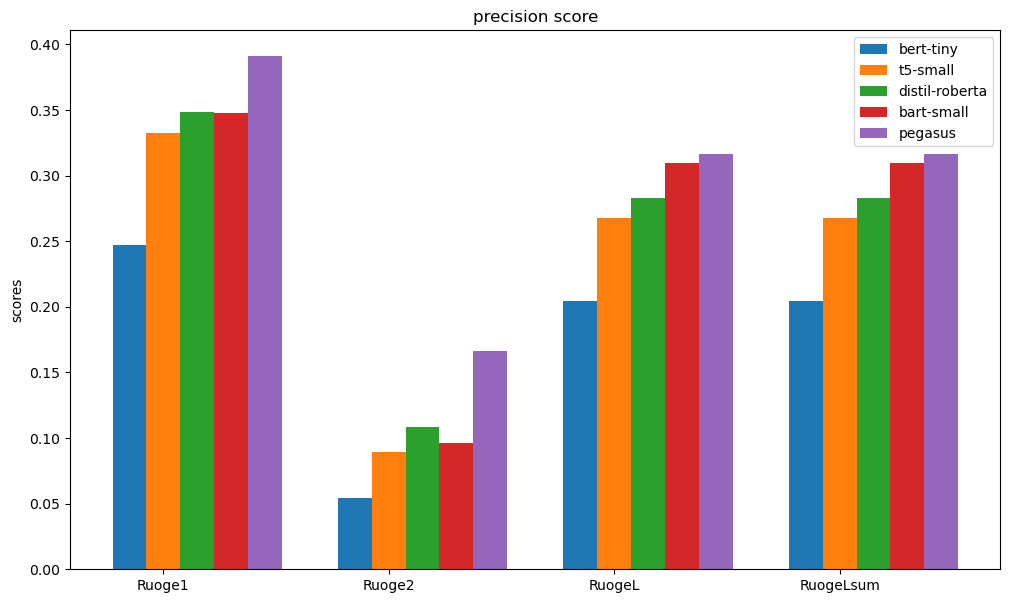

In [13]:
plot_results('precision', df)

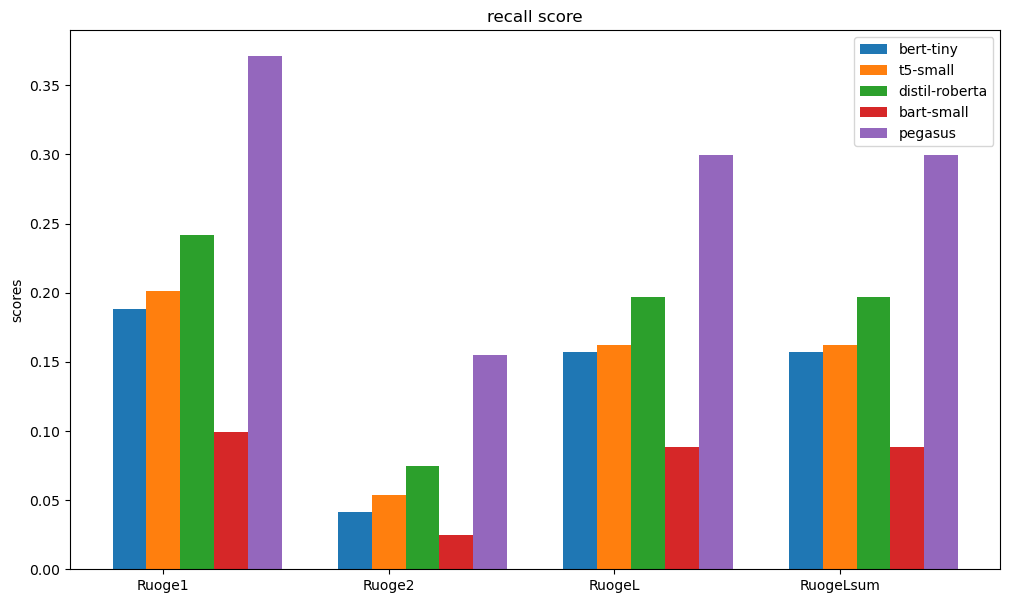

In [14]:
plot_results('recall', df)

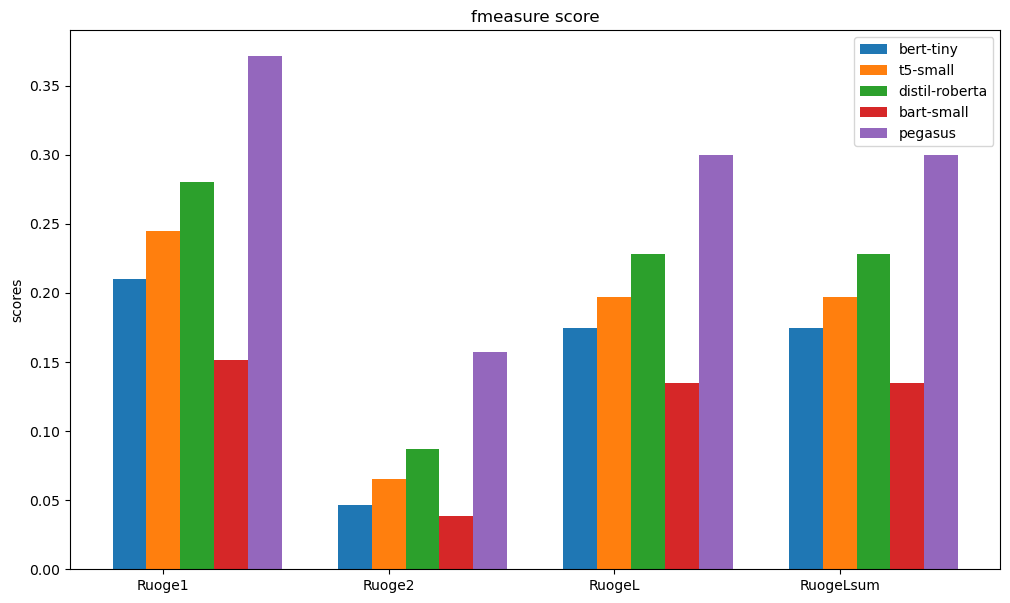

In [15]:
plot_results('fmeasure', df)